This Notebook aimed at replicating Maro's work in the parper Mid-air Gesture Recognition Using Event-Based Vision Sensor

In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt


from HOTS.Monitor import GenerateAM, DisplayAM
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer, FilterNHBD
from HOTS.Monitor import DisplayImage, DisplaySurface3D, DisplaySurface2D, DisplayConvergence
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.Cluster import KmeansMaro

## Defining Common parameter

In [12]:
tau = 0.02
R = 2
nb_cluster = 4
ImageSize = (32,32)
KN=2

## Exp1 : Reproducing Maro Processing using input with 1 polarity and one training cycle

In [14]:
save_exp =False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='Maro', ThrFilter=2)
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='Maro', ThrFilter=2)
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='Maro', ThrFilter=2)
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=3)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/Exp/Exp1_2017_10_9.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/Exp/Exp1_2017_10_9.pkl')
    eucli,norma,battach = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 87.50% 
 Normalized Norm 87.50%             
 BattachaNorm 90.00%


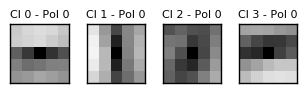

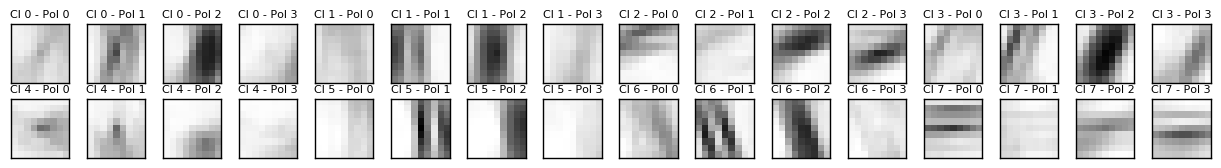

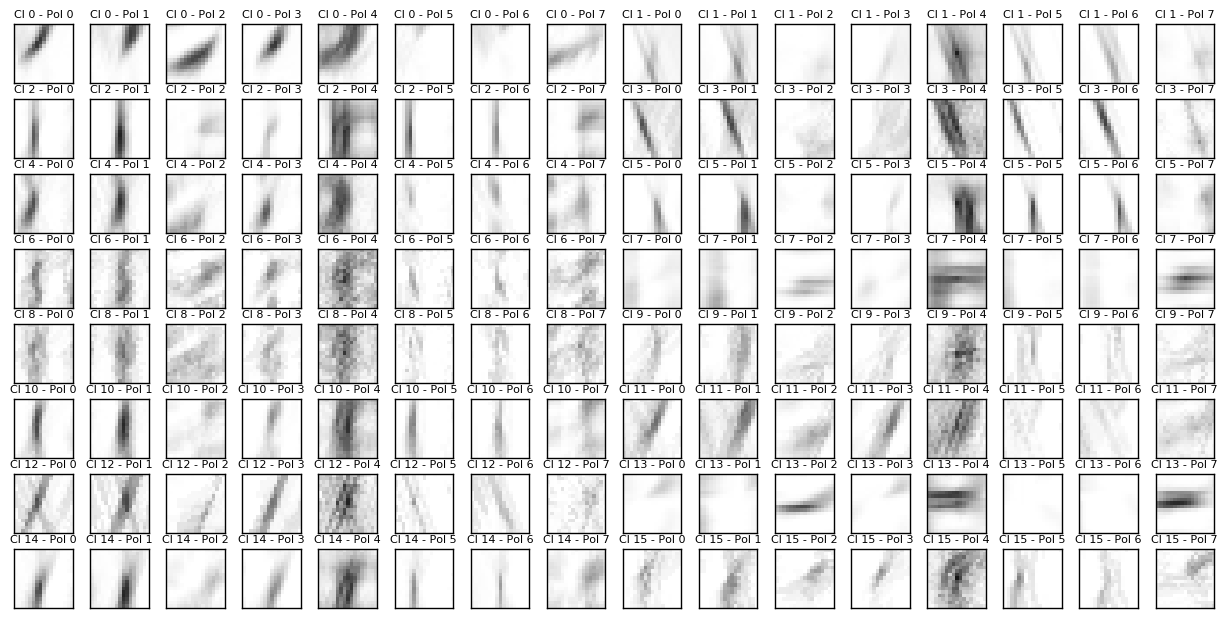

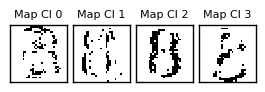

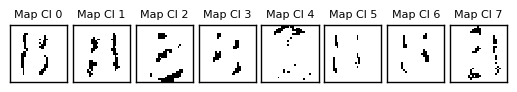

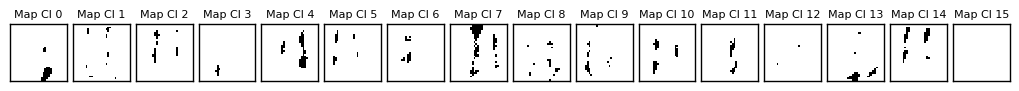

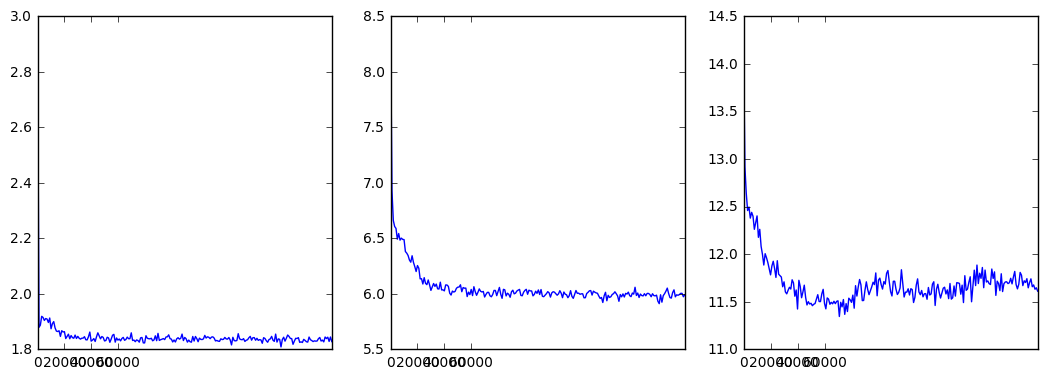

In [15]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=True)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp2 : Reproducing Maro Processing using input with 2 polarities and one training cycle

In [24]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = False, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='Maro', ThrFilter=2)
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='Maro', ThrFilter=2)
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='Maro', ThrFilter=2)
Net = Network([L1,L2,L3]) 

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000,NbCycle=1)
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)
    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)
    eucli,norma,battach = Classif0.HistogramDistance()
    SaveObject([ClusterLayer,Classif0],'../Records/Exp/Exp2_2017_10_9.pkl')
else :
    ClusterLayer,Classif0 = LoadObject('../Records/Exp/Exp2_2017_10_9.pkl')
    eucli,norma,battach = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 97.50% 
 Normalized Norm 100.00%             
 BattachaNorm 97.50%


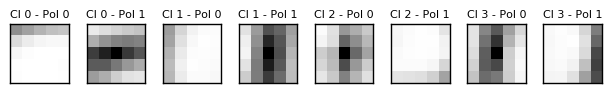

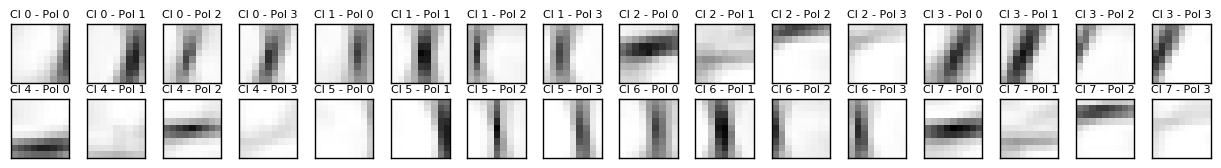

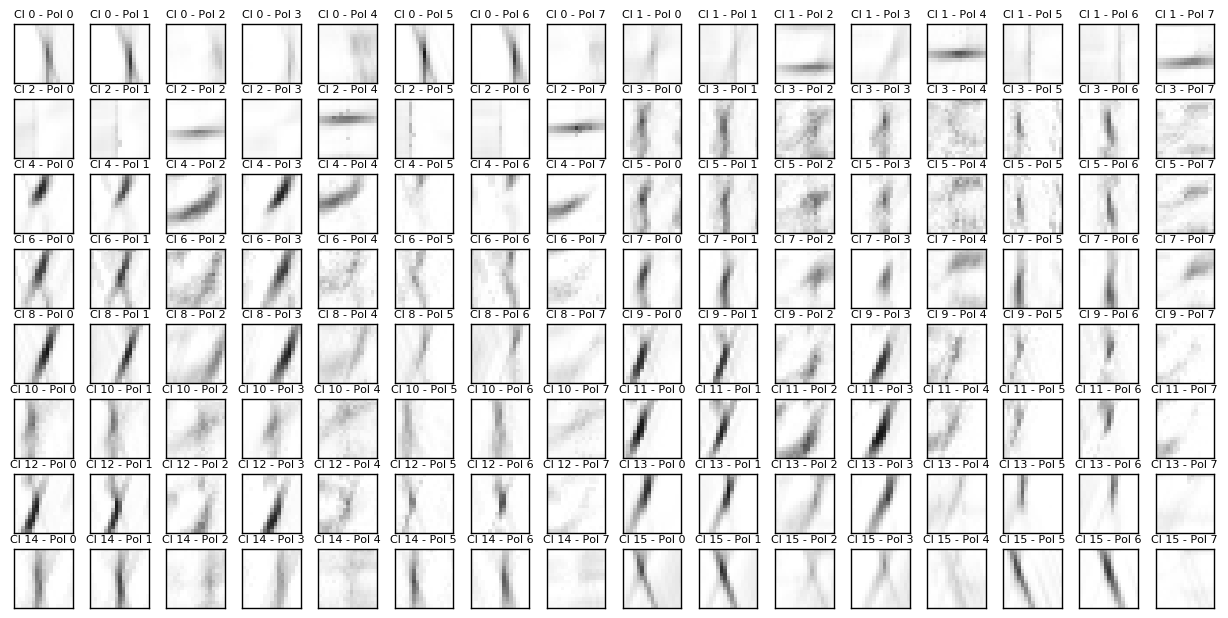

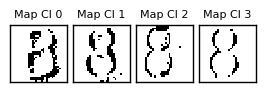

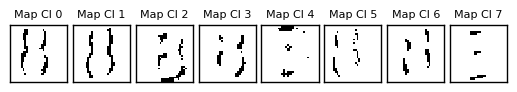

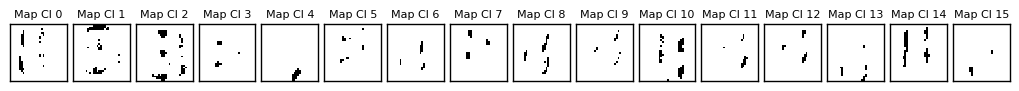

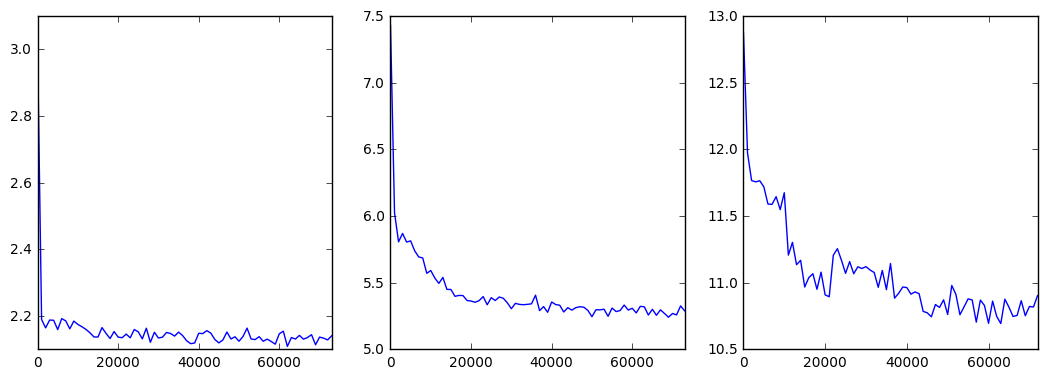

In [25]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp3 : Reproducing Maro Processing using input with 2 polarity and 5 training cycle

In [26]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = False, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='Maro', ThrFilter=2)
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='Maro', ThrFilter=2)
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='Maro', ThrFilter=2)
Net = Network([L1,L2,L3])    

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                  NbCycle=5, record_each=1000)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach = Classif0.HistogramDistance()
    SaveObject([ClusterLayer,Classif0],'../Records/Exp/Exp3_2017_10_9.pkl')
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/Exp/Exp3_2017_10_9.pkl')
    eucli,norma,battach = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 87.50% 
 Normalized Norm 90.00%             
 BattachaNorm 90.00%


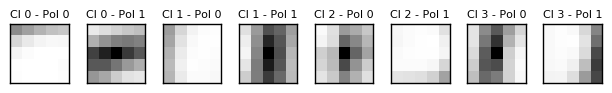

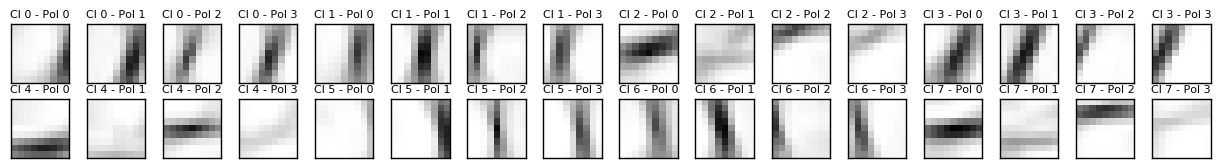

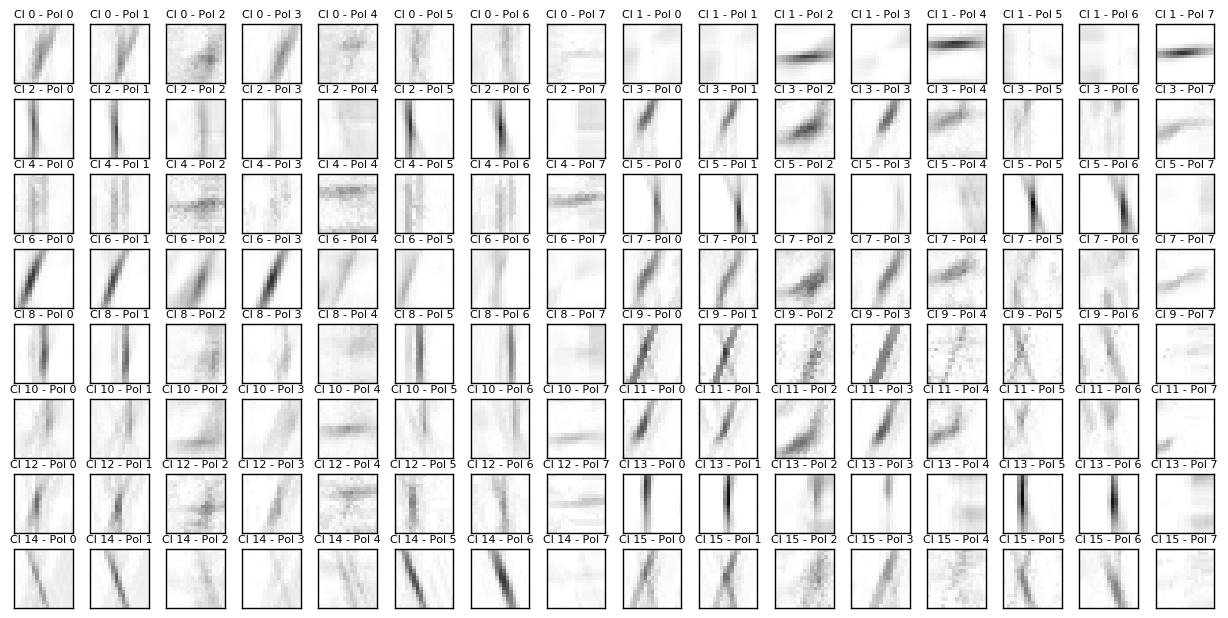

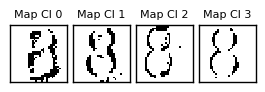

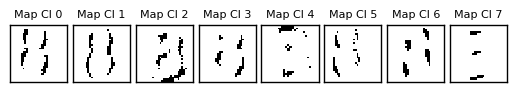

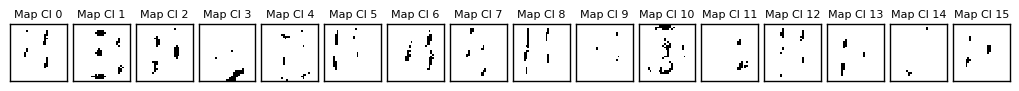

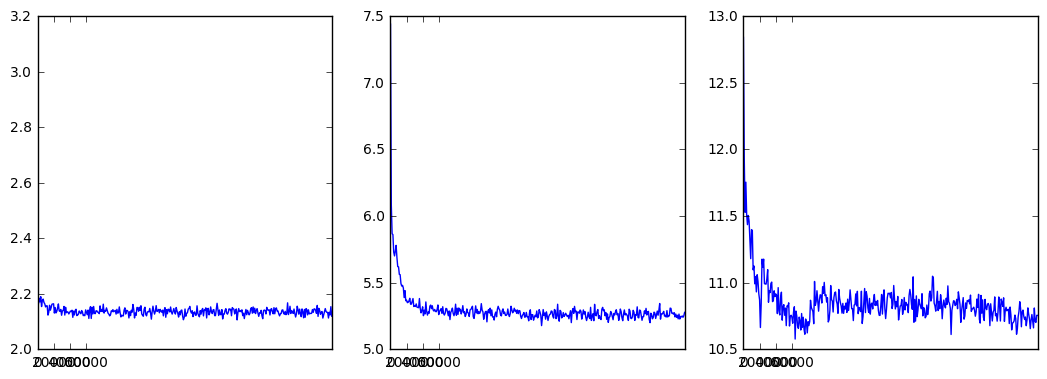

In [27]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp4 : Reproducing Maro Processing using input with 2 polarity, 1 training cycle, with an exponential kernel, without filtering

In [28]:
save_exp = True
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = False, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='MaroExp')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='MaroExp')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='MaroExp')
Net = Network([L1,L2,L3])    

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN, 
                                                  NbCycle=1,record_each=1000)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach = Classif0.HistogramDistance()
    SaveObject([ClusterLayer,Classif0],'../Records/Exp/Exp4_2017_10_9.pkl')
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/Exp/Exp4_2017_10_9.pkl')
    eucli,norma,battach = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 100.00% 
 Normalized Norm 100.00%             
 BattachaNorm 100.00%


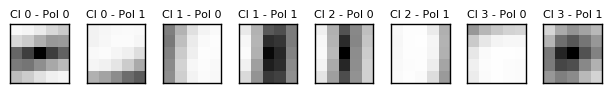

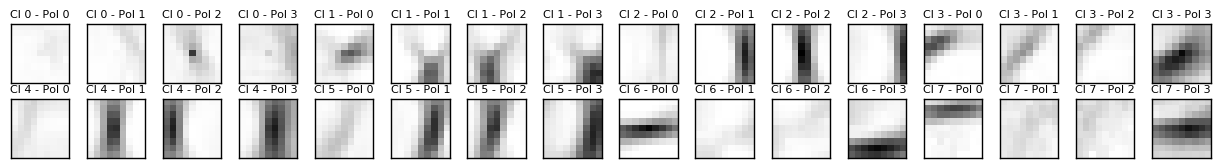

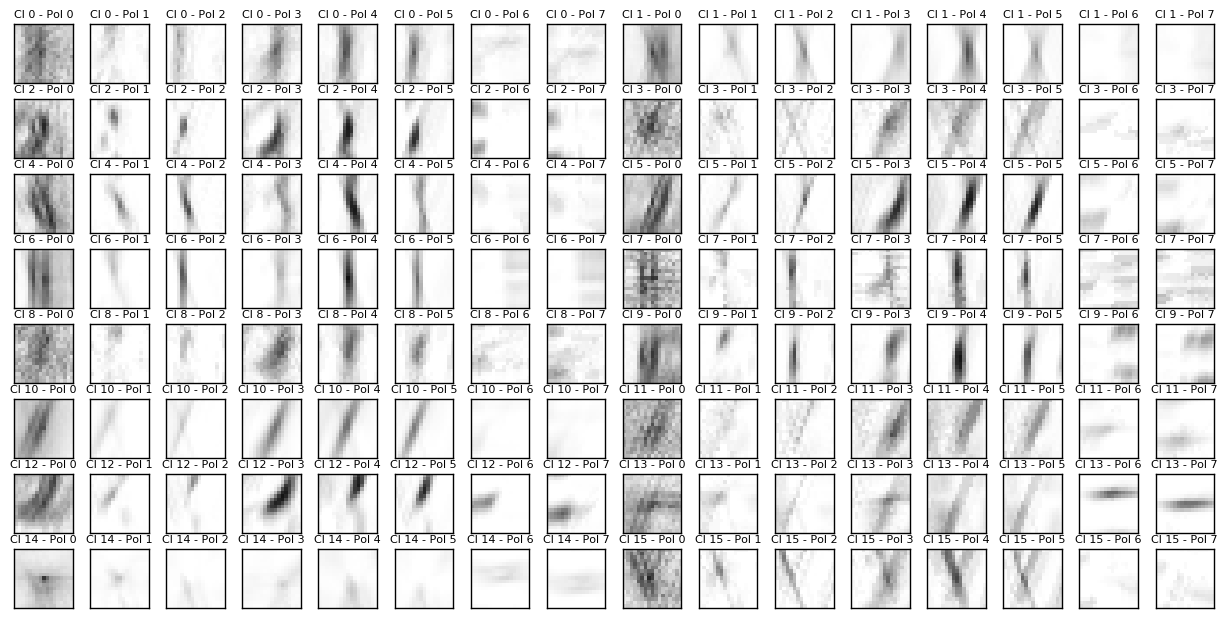

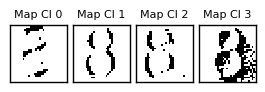

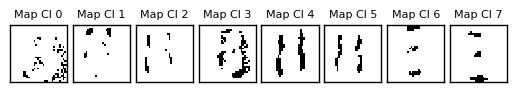

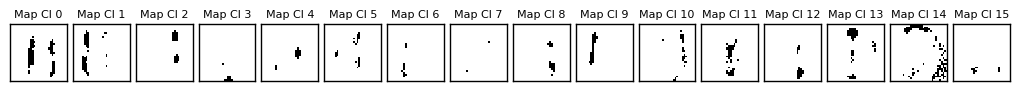

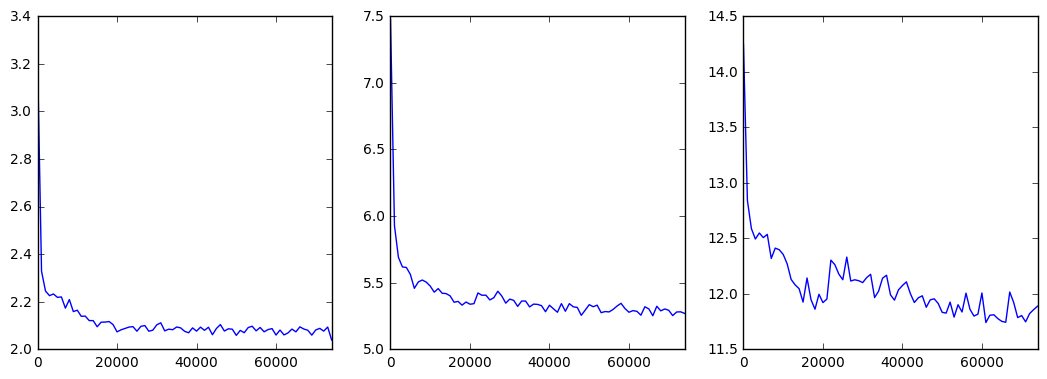

In [29]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp5 : Reproducing Maro Processing using input with 2 polarity, 5 training cycle, with an exponential kernel

In [30]:
save_exp = True
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = False, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='MaroExp')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='MaroExp')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='MaroExp')
Net = Network([L1,L2,L3])    

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN, 
                                                  NbCycle=5,record_each=1000)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach = Classif0.HistogramDistance()
    SaveObject([ClusterLayer,Classif0],'../Records/Exp/Exp5_2017_10_9.pkl')
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/Exp/Exp5_2017_10_9.pkl')
    eucli,norma,battach = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 92.50% 
 Normalized Norm 90.00%             
 BattachaNorm 92.50%


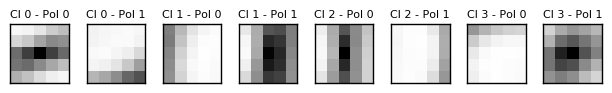

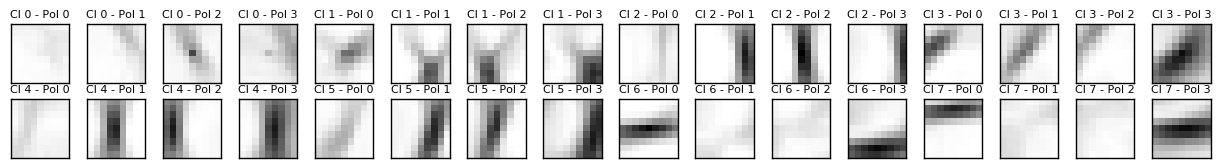

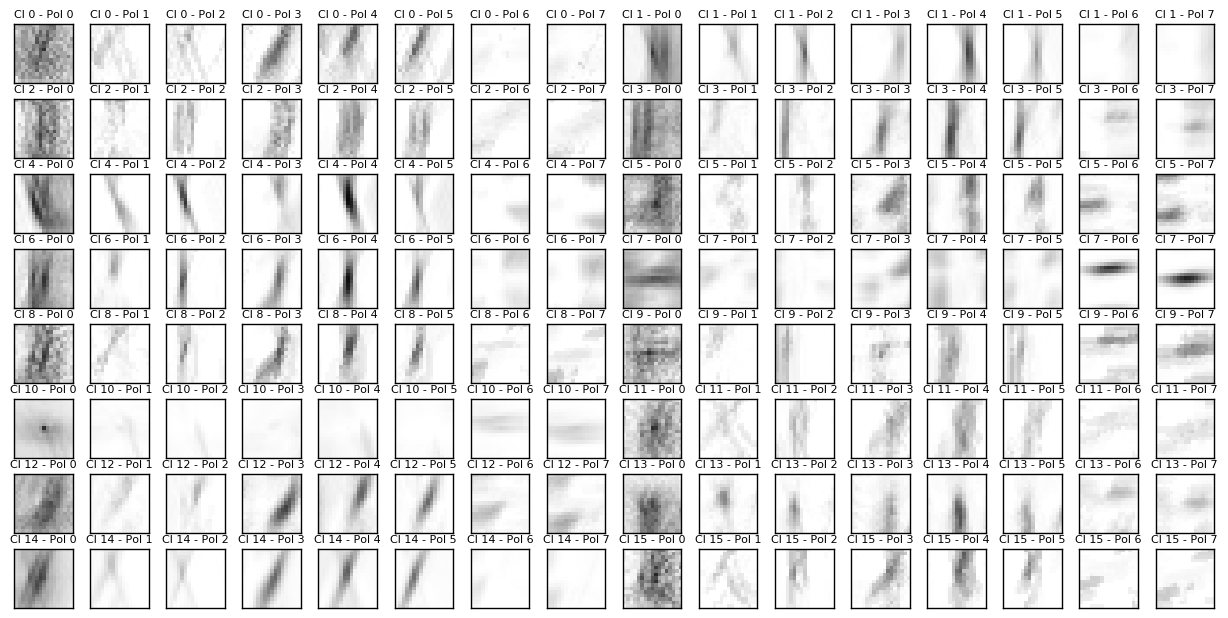

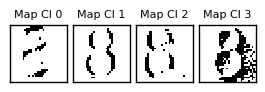

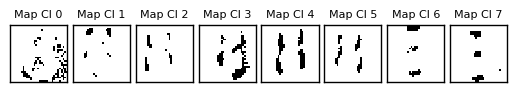

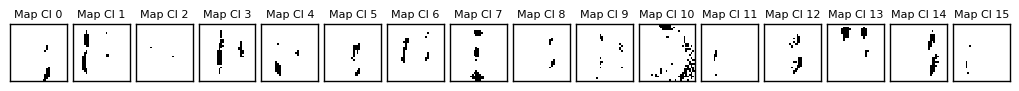

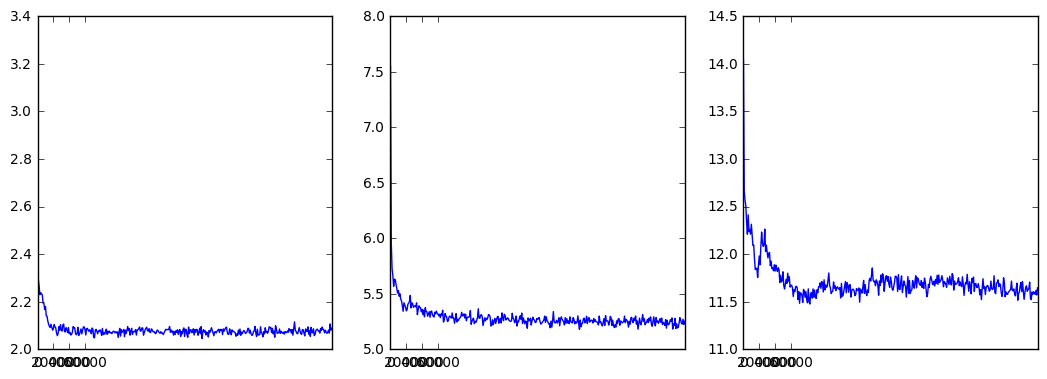

In [31]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp6 : Reproducing Maro Processing using input with 2 polarity, 1 training cycle, with an exponential kernel and with filtering

## Exp5 : Reproducing Maro Processing using input with 1 polarity, 1 training cycle, with an exponential kernel

In [ ]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = True, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='MaroExp')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='MaroExp')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='MaroExp')
Net = Network([L1,L2,L3])    

#### Training The Cluster on 5 images
ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN, 
                                              NbCycle=4,record_each=1000)

## Generating histogram for training samples
event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

## Generating histogram for the test samples
event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

eucli,norma,battach = Classif0.HistogramDistance()

In [ ]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
DisplayConvergence(ClusterLayer)

## Defining General Parameter

In [ ]:
SaveCluster = True
LoadCluster = True

ClusterFile = '../Records/ClassifyingNotebook/Clusters.pkl'
tau = 0.02
R = 2
nb_cluster = 4
ImageSize = (32,32)

## Clustering

In [ ]:
image_list = [1, 32, 19, 22, 29]
event0_tr = Event(ImageSize=(32,32), ListPolarities=[-1,1], OutOnePolarity=False)

event0_tr.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)
#SpTe_Layer1= STS(tau=tau, R=R,verbose=1)
#Surface_Layer1 = SpTe_Layer1.create(event = event0, kernel='linear')
#event1, filt1 = SpTe_Layer1.FilterRecent1(event0,threshold=3)
#DisplayImage([event0],multi_image=1)
#DisplayImage([event1],multi_image=1)
#print(event0.address.shape[0])
#print(event1.address.shape[0])

In [ ]:
## Layer1
SpTe_Layer1= STS(tau=tau, R=R,verbose=1)
Surface_Layer1 = SpTe_Layer1.create(event = event0_tr, kernel='linear')
event1_tr, filt1 = SpTe_Layer1.FilterRecent(event0_tr,threshold=2)
ClusterLayer1 = KmeansMaro(nb_cluster = nb_cluster, record_each=1000, verbose=1)
Prototype1 = ClusterLayer1.fit(SpTe_Layer1,NbCycle=2)
event2_tr,_ = ClusterLayer1.predict(STS=SpTe_Layer1,event = event1_tr)

## Layer2
SpTe_Layer2= STS(tau=10*tau, R=2*R,verbose=1)
Surface_Layer2 = SpTe_Layer2.create(event = event2_tr, kernel='linear')
event3_tr, filt2 = SpTe_Layer2.FilterRecent(event2_tr, threshold=2)
ClusterLayer2 = KmeansMaro(nb_cluster = 2*nb_cluster, record_each=1000, verbose=1)
Prototype2 = ClusterLayer2.fit(SpTe_Layer2,NbCycle=5)
event4_tr,_ = ClusterLayer2.predict(STS=SpTe_Layer2,event = event3_tr)

## Layer3
SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R,verbose=1)
Surface_Layer3 = SpTe_Layer3.create(event = event4_tr, kernel='linear')
event5_tr, filt3 = SpTe_Layer3.FilterRecent(event4_tr, threshold=2)
ClusterLayer3 = KmeansMaro(nb_cluster = 2*2*nb_cluster, record_each=1000, verbose=1)
Prototype3 = ClusterLayer3.fit(SpTe_Layer3,NbCycle=5)
event6_tr,_ = ClusterLayer3.predict(STS=SpTe_Layer3,event = event5_tr)

In [ ]:
DisplayImage([event0_tr,event1_tr,event2_tr,event3_tr])

In [ ]:
print(event0_tr.address.shape[0])
print(event1_tr.address.shape[0])
print(event2_tr.address.shape[0])
print(event3_tr.address.shape[0])
print(event4_tr.address.shape[0])
print(event5_tr.address.shape[0])
print(event6_tr.address.shape[0])

In [ ]:
plt.plot(ClusterLayer1.record['error'])

In [ ]:
plt.plot(ClusterLayer2.record['error'])

In [ ]:
plt.plot(ClusterLayer3.record['error'])



In [ ]:
print(Prototype2.shape)


In [ ]:
DisplaySurface2D(Prototype1,nb_polarities=2)
DisplaySurface3D(Prototype1,nb_polarities=2)
DisplaySurface2D(Prototype2,nb_polarities=4)
DisplaySurface3D(Prototype2,nb_polarities=4)
DisplaySurface2D(Prototype3,nb_polarities=8)
DisplaySurface3D(Prototype3,nb_polarities=8)

## Testing

In [ ]:
event0_te = Event(ImageSize=(32,32),ListPolarities=[-1,1], OutOnePolarity=False)
event0_te.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
SpTe_Layer1= STS(tau=tau, R=R,verbose=0)
Surface_Layer1 = SpTe_Layer1.create(event = event0_te, kernel='linear')
event1_te, filt = SpTe_Layer1.FilterRecent(event0_te, threshold=2)
event2_te,_ = ClusterLayer1.predict(STS=SpTe_Layer1,event = event1_te)

SpTe_Layer2= STS(tau=10*tau, R=2*R,verbose=0)
Surface_Layer2 = SpTe_Layer2.create(event = event2_te, kernel='linear')
event3_te, filt = SpTe_Layer2.FilterRecent(event2_te, threshold=2)
event4_te,_ = ClusterLayer2.predict(STS=SpTe_Layer2,event = event3_te)


SpTe_Layer3= STS(tau=10*10*tau, R=2*2*R,verbose=0)
Surface_Layer3 = SpTe_Layer3.create(event = event4_te, kernel='linear')
event5_te, filt = SpTe_Layer3.FilterRecent(event4_te, threshold=2)
event6_te,_ = ClusterLayer3.predict(STS=SpTe_Layer3,event = event5_te)


In [ ]:
mapL1 = GenerateAM(event2_te,ClusterLayer1)
DisplayAM(mapL1)
mapL2 = GenerateAM(event4_te,ClusterLayer2)
DisplayAM(mapL2)
mapL3 = GenerateAM(event6_te,ClusterLayer3)
DisplayAM(mapL3)



In [ ]:
## Running all the network for classification


In [ ]:
tau = 0.02
R = 2
KN = 2
nb_cluster = 4
ImageSize = (32,32)

In [ ]:
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, mode='Maro', ThrFilter=2)
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, mode='Maro', ThrFilter=2)
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, mode='Maro', ThrFilter=2)

Net = Network([L1,L2,L3])    
#### Training The Cluster on 5 images
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)

ClusterLayer, event_output = Net.TrainCluster(event = event0,nb_cluster=nb_cluster, KN=KN)

In [ ]:
## Generating histogram for training samples

In [ ]:
training_sample = list(np.arange(36))
event0_tr = Event(ImageSize=(32,32), ListPolarities=[-1,1], OutOnePolarity=False)
event0_tr.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=training_sample)

event0_o_tr = Net.RunNetwork(event0_tr, ClusterList=ClusterLayer)

In [ ]:
## Generating histogram for the test samples

In [ ]:
testing_sample = list(np.arange(36,76))
event0_te = Event(ImageSize=(32,32), ListPolarities=[-1,1], OutOnePolarity=False)
event0_te.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=testing_sample)

event0_o_te = Net.RunNetwork(event0_te, ClusterList=ClusterLayer)

In [ ]:
label_list=LoadObject('../Data/alphabet_label.pkl')
## Generate Groud Truth Label
for idx,img in enumerate(testing_sample):
    if idx!= 0:
        test_label = np.vstack((test_label,label_list[img]))
    else:
        test_label = label_list[img]

In [ ]:
print(test_label, len(test_label))
Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_list, GroundTruth=test_label)
_,_,_ = Classif0.HistogramDistance()

